<a href="https://colab.research.google.com/github/shahdtamerr21/Merkle-Tree/blob/main/Merkle_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

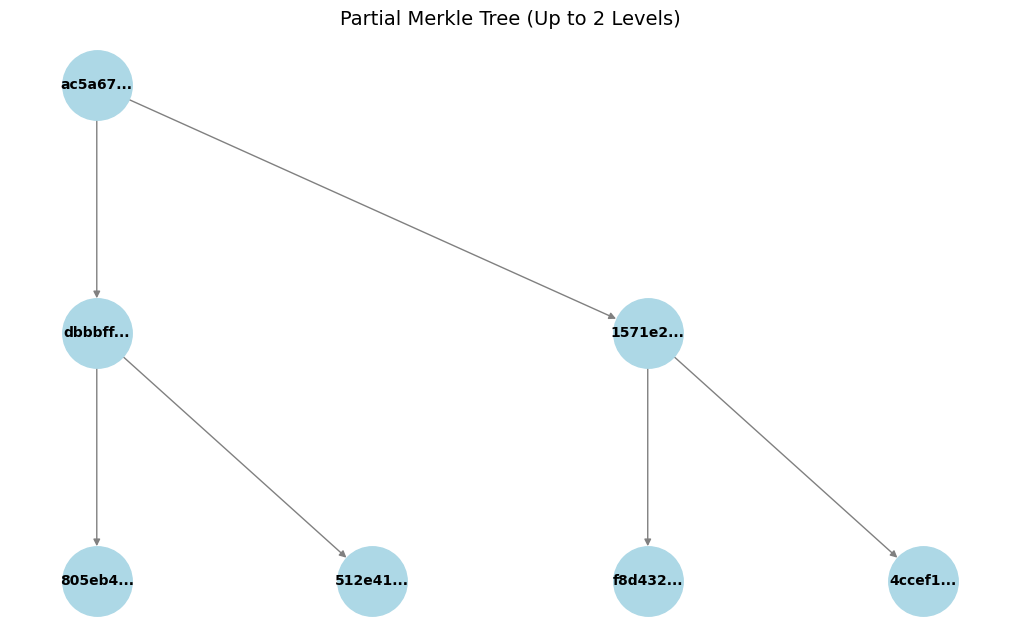

Merkle Root: ac5a6709ae55406074a95b411070973cda220864e9f321505c5249352f0c0d2d


In [1]:
import hashlib
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load transaction hashes from the CSV file
file_path = "/content/bitcoin_block_641818.csv"
df = pd.read_csv(file_path)
tx_hashes = df["hash"].astype(str).tolist()

def double_sha256(data):
    """Applies double SHA-256 hashing."""
    return hashlib.sha256(hashlib.sha256(data.encode()).digest()).hexdigest()

def build_merkle_tree(tx_list):
    """Builds the Merkle Tree iteratively and returns all levels."""
    if not tx_list:
        return [["EMPTY TREE"]]

    tree = [tx_list]  # First level contains transactions
    current_level = tx_list

    while len(current_level) > 1:
        if len(current_level) % 2 == 1:
            current_level.append(current_level[-1])  # Duplicate last node if odd

        next_level = [double_sha256(current_level[i] + current_level[i + 1])
                      for i in range(0, len(current_level), 2)]

        tree.append(next_level)
        current_level = next_level

    return tree[::-1]  # Reverse so the root is at index 0

def plot_partial_merkle_tree(tree, depth=2):
    """Visualizes a small part of the Merkle Tree up to a given depth."""
    G = nx.DiGraph()
    positions = {}
    y_spacing = 3

    partial_tree = tree[:depth+1]  # Keep only the first few levels

    for y, level in enumerate(partial_tree):
        x_spacing = 2 ** (len(partial_tree) - y - 1)
        for i, node in enumerate(level):
            short_hash = node[:6] + "..."
            G.add_node(short_hash)
            positions[short_hash] = (i * x_spacing, -y * y_spacing)

            if y > 0:
                parent_index = i // 2
                parent_short = partial_tree[y - 1][parent_index][:6] + "..."
                G.add_edge(parent_short, short_hash)

    plt.figure(figsize=(10, 6))
    nx.draw(G, positions, with_labels=True, node_size=2500, node_color="lightblue",
            edge_color="gray", font_size=10, font_weight="bold", arrows=True)
    plt.title(f"Partial Merkle Tree (Up to {depth} Levels)", fontsize=14)
    plt.show()

# Build and visualize the Merkle Tree from the CSV file
tree = build_merkle_tree(tx_hashes)
plot_partial_merkle_tree(tree, depth=2)

# Print Merkle Root
print("Merkle Root:", tree[0][0])  # Root is at index 0
